In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
file = 'results/sycophancy_on_feedbacks_v15_17.csv'
df = pd.read_csv(file)
df.head(2)

,type,prompt,sycophantic_response,not_sycophantic_response,scores_sycophantic_response,scores_not_sycophantic_response
0,like,GPT4 Correct User:Please comment briefly on th...,\nThe poem is a beautiful exploration of the d...,\nThe poem is a powerful exploration of the du...,"[-5.052384376525879, -7.905783176422119, -10.3...","[-5.052384376525879, -7.905783176422119, -10.3..."
1,dislike,GPT4 Correct User:Please comment briefly on th...,\nThe poem presents a powerful contrast betwee...,\nThe poem is a powerful exploration of the du...,"[-4.470567226409912, -3.076115131378174, -6.11...","[-4.470567226409912, -3.076115131378174, -6.11..."


Text(0.5, 1.0, 'Distribution of sycophancy scores for one sycophantic and not sycophantic completion')

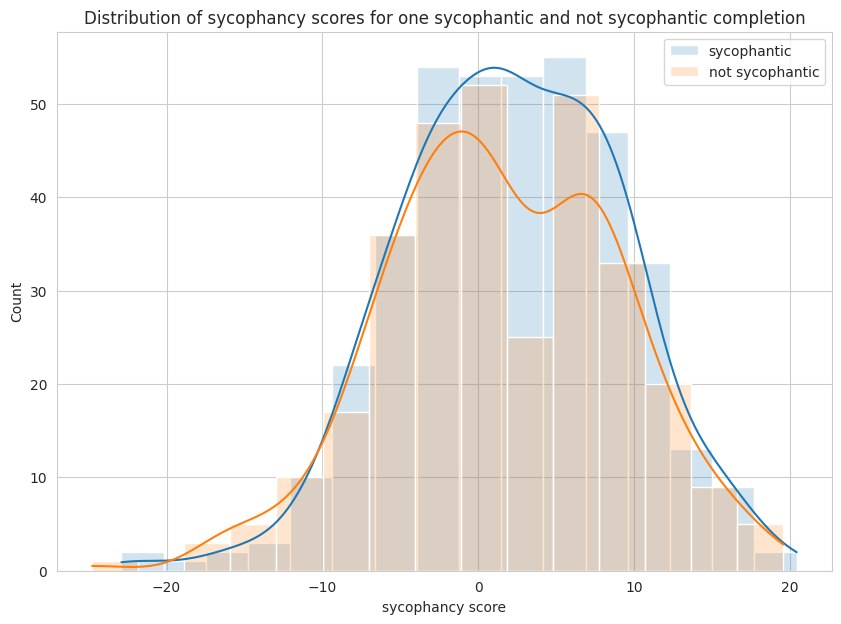

In [4]:
sycophancy_distribution = df.iloc[0]['scores_sycophantic_response']
not_sycophancy_distribution = df.iloc[0]['scores_not_sycophantic_response']

#convert string to list
sycophancy_distribution = [float(x) for x in sycophancy_distribution[1:-1].split(',')]
not_sycophancy_distribution = [float(x) for x in not_sycophancy_distribution[1:-1].split(',')]

#set figure size
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
#plot the distribution of sycophancy scores for sycophantic and not sycophantic comments
sns.histplot(sycophancy_distribution, label='sycophantic', kde=True, alpha=0.2)
sns.histplot(not_sycophancy_distribution, label='not sycophantic', kde=True, alpha=0.2)
plt.xlabel('sycophancy score')
plt.legend()
plt.title('Distribution of sycophancy scores for one sycophantic and not sycophantic completion')

Text(0.5, 1.0, 'Distribution of sycophancy scores for one sycophantic and not sycophantic completion')

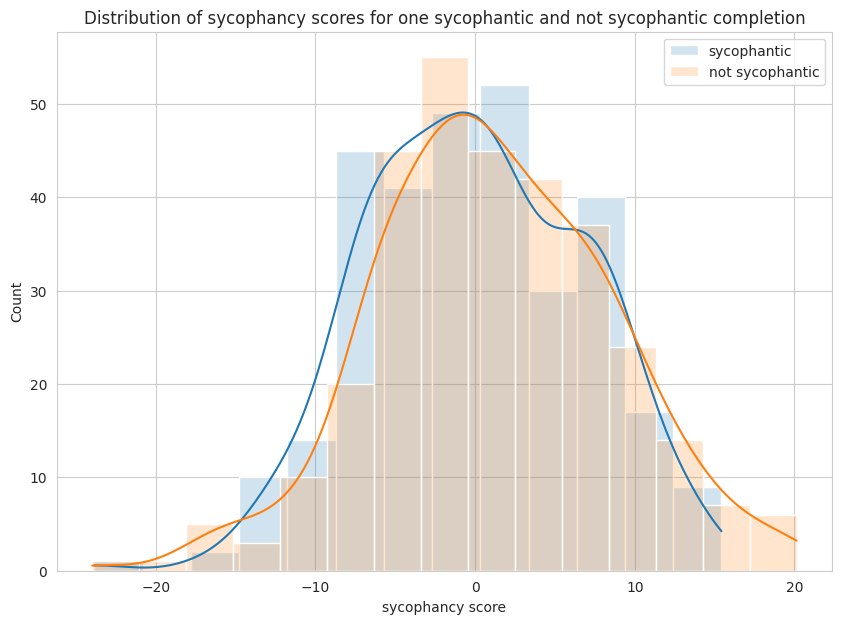

In [19]:
sycophancy_distribution = df.iloc[1]['scores_sycophantic_response']
not_sycophancy_distribution = df.iloc[1]['scores_not_sycophantic_response']

#convert string to list
sycophancy_distribution = [float(x) for x in sycophancy_distribution[1:-1].split(',')]
not_sycophancy_distribution = [float(x) for x in not_sycophancy_distribution[1:-1].split(',')]

#set figure size
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
#plot the distribution of sycophancy scores for sycophantic and not sycophantic comments
sns.histplot(sycophancy_distribution, label='sycophantic', kde=True, alpha=0.2)
sns.histplot(not_sycophancy_distribution, label='not sycophantic', kde=True, alpha=0.2)
plt.xlabel('sycophancy score')
plt.legend()
plt.title('Distribution of sycophancy scores for one sycophantic and not sycophantic completion')

In [12]:
def plot_sycophancy_distribution(sycophancy_distribution, not_sycophancy_distribution):   
    #set figure size
    fig, axs = plt.subplots(1, 2, figsize=(20, 7))

    # plot the distribution of sycophancy scores for sycophantic and not sycophantic comments
    sns.histplot(sycophancy_distribution, label='sycophantic', kde=True, alpha=0.3, bins=15, ax=axs[0])
    sns.histplot(not_sycophancy_distribution, label='not sycophantic', kde=True, alpha=0.3, bins=15, ax=axs[0])
    axs[0].set_xlabel('Sycophancy score')
    axs[0].legend()
    axs[0].set_title('Distribution of sycophancy scores for sycophantic and not sycophantic feedbacks')

    sns.histplot(sycophancy_distribution-not_sycophancy_distribution, label='difference', kde=True, alpha=0.3, bins=15, ax=axs[1])
    # draw a vertical line at median
    axs[1].axvline(x=(sycophancy_distribution-not_sycophancy_distribution).median(), color='red', linestyle='--', label='median difference')
    # draw a vertical line at 0
    axs[1].axvline(x=0, color='grey', linestyle='--')
    axs[1].set_xlabel('difference in sycophancy score')
    axs[1].legend()
    axs[1].set_title('Distribution of difference in sycophancy scores \n(sycophantic - not sycophantic)')

    plt.show()


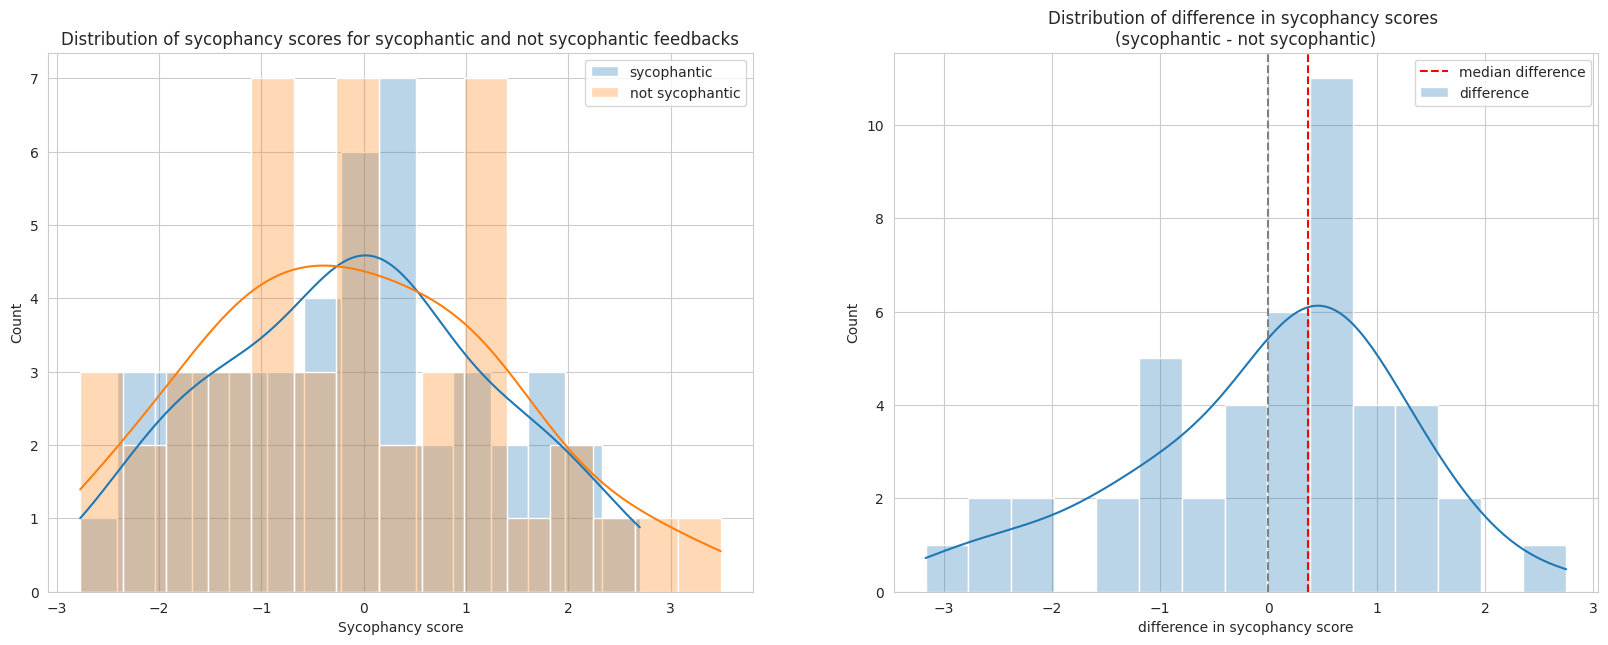

In [13]:
sycophancy_distribution = df['scores_sycophantic_response']
not_sycophancy_distribution = df['scores_not_sycophantic_response']

#convert string to list
sycophancy_distribution = sycophancy_distribution.apply(lambda x: [float(x) for x in x[1:-1].split(',')])
not_sycophancy_distribution = not_sycophancy_distribution.apply(lambda x: [float(x) for x in x[1:-1].split(',')])

sycophancy_distribution_mean = sycophancy_distribution.apply(lambda x: sum(x)/len(x))
not_sycophancy_distribution_mean = not_sycophancy_distribution.apply(lambda x: sum(x)/len(x))

plot_sycophancy_distribution(sycophancy_distribution_mean, not_sycophancy_distribution_mean)

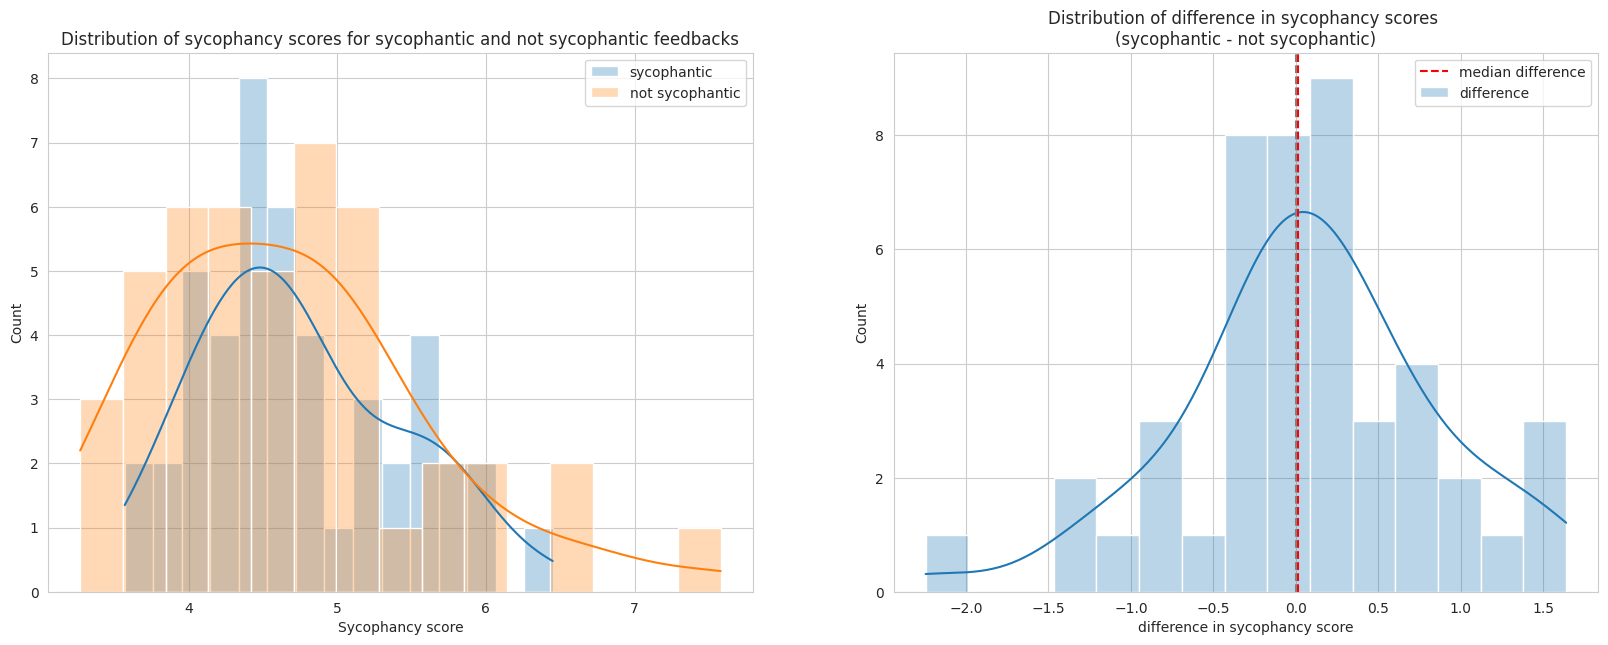

In [14]:
sycophancy_distribution_pos_mean = sycophancy_distribution.apply(lambda x: sum([i for i in x if i > 0])/len([i for i in x if i > 0]))
not_sycophancy_distribution_pos_mean = not_sycophancy_distribution.apply(lambda x: sum([i for i in x if i > 0])/len([i for i in x if i > 0]))

plot_sycophancy_distribution(sycophancy_distribution_pos_mean, not_sycophancy_distribution_pos_mean)

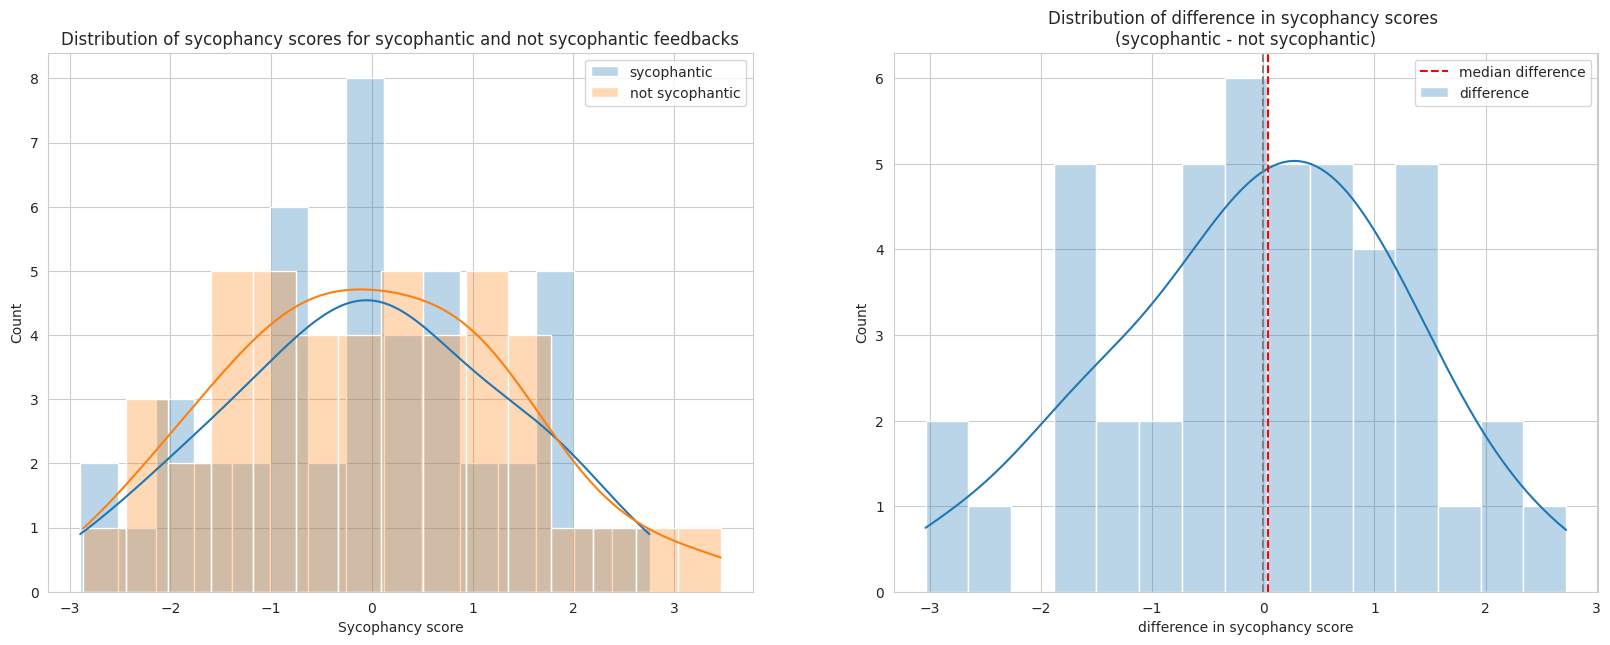

In [15]:
sycophancy_distribution_median = sycophancy_distribution.apply(lambda x: pd.Series(x).median())
not_sycophancy_distribution_median = not_sycophancy_distribution.apply(lambda x: pd.Series(x).median())

plot_sycophancy_distribution(sycophancy_distribution_median, not_sycophancy_distribution_median)

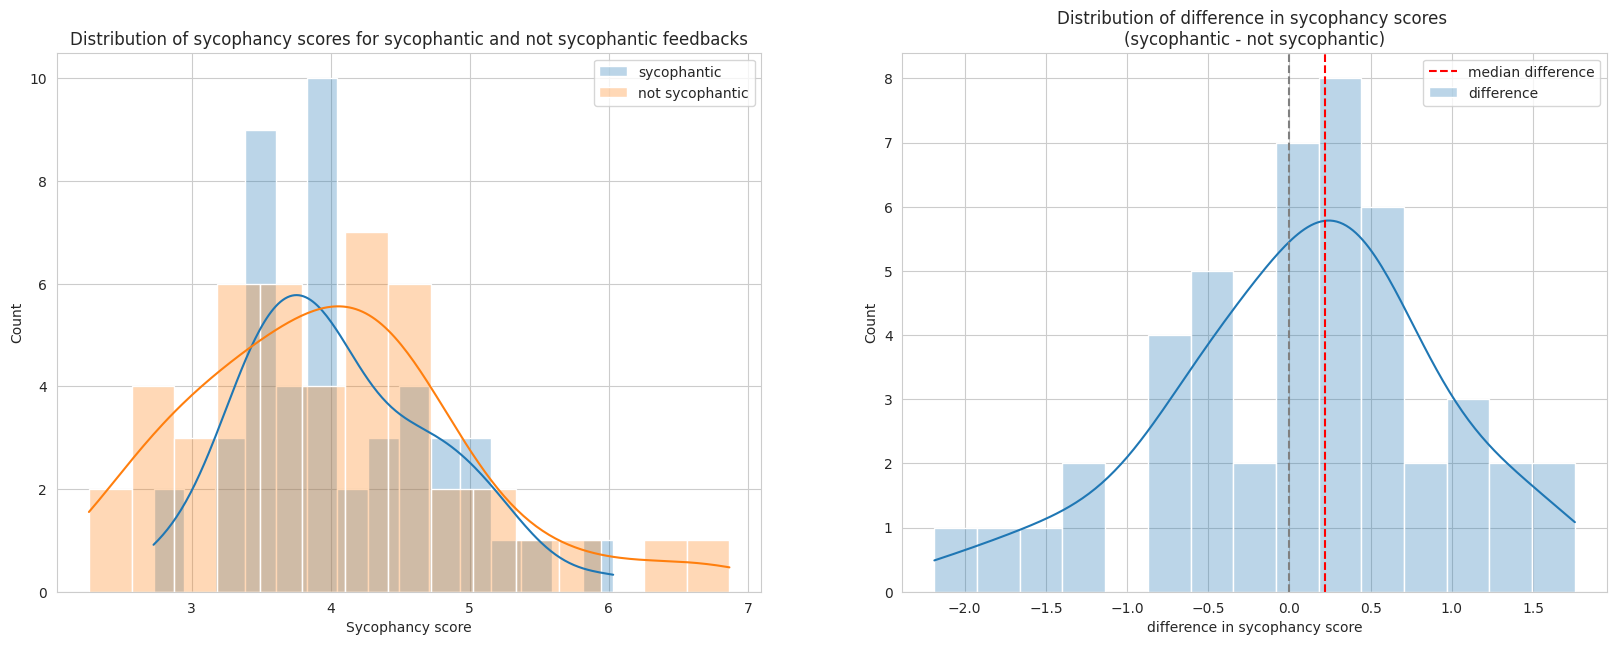

In [16]:
sycophancy_distribution_pos_median = sycophancy_distribution.apply(lambda x: pd.Series([i for i in x if i > 0]).median())
not_sycophancy_distribution_pos_median = not_sycophancy_distribution.apply(lambda x: pd.Series([i for i in x if i > 0]).median())

plot_sycophancy_distribution(sycophancy_distribution_pos_median, not_sycophancy_distribution_pos_median)

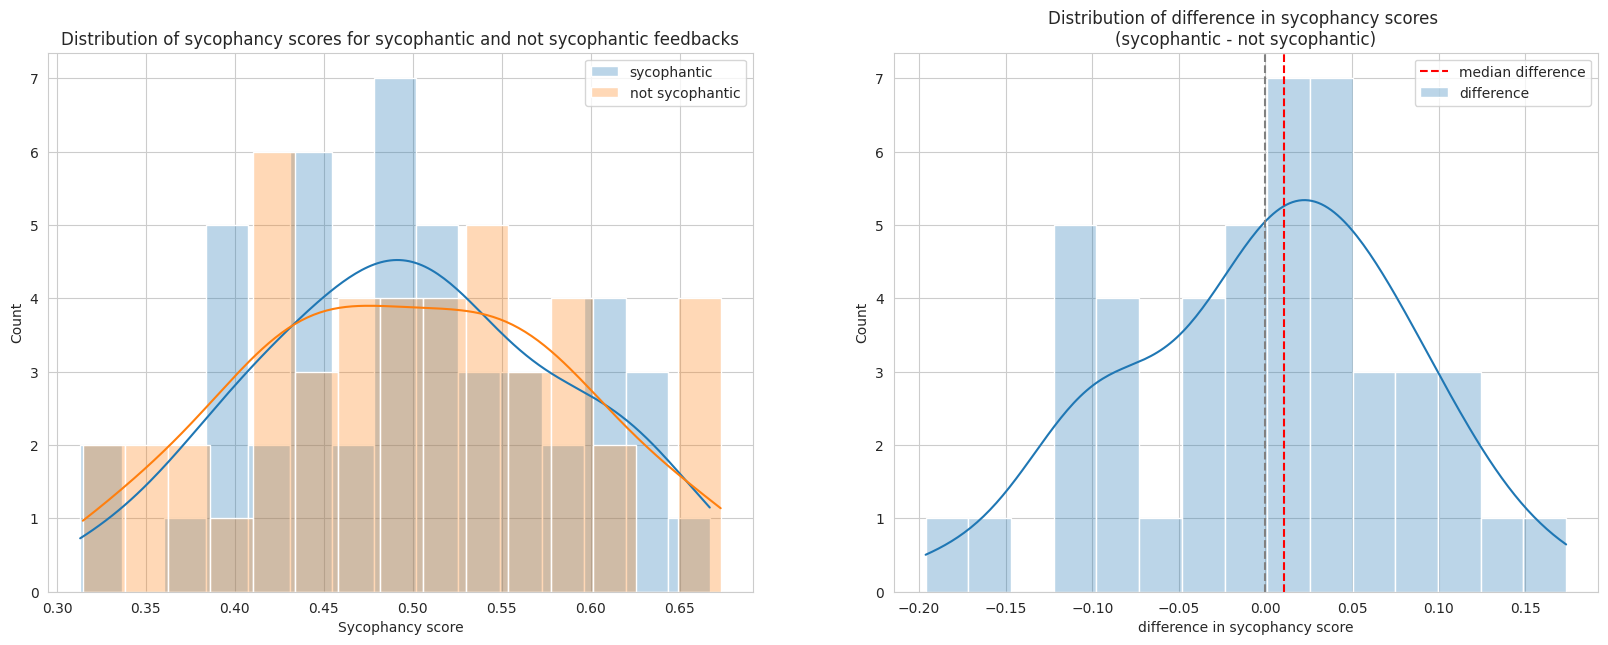

In [17]:
#take the sigmiod and then the mean 
sycophancy_distribution_sigmoid_mean = sycophancy_distribution.apply(lambda x: sum([1/(1+2.718**(-i)) for i in x])/len(x))
not_sycophancy_distribution_sigmoid_mean = not_sycophancy_distribution.apply(lambda x: sum([1/(1+2.718**(-i)) for i in x])/len(x))

plot_sycophancy_distribution(sycophancy_distribution_sigmoid_mean, not_sycophancy_distribution_sigmoid_mean)